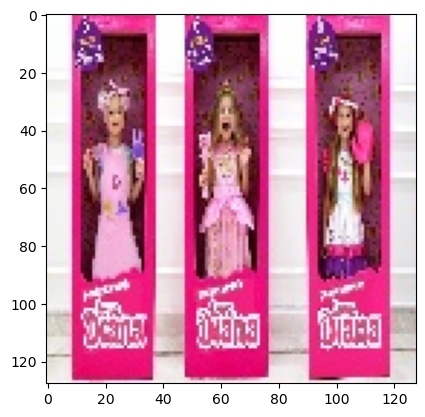

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

images_paths = pd.read_csv("train.csv")
images = []

for i, row in images_paths.iterrows():
    img = cv2.imread(row['path'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

plt.imshow(images[-1])

In [48]:
np.unique(y_subset, return_counts=1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([102, 112,  99,  92,  99,  85, 107, 102,  99, 103], dtype=int64))

In [25]:
import cv2
import matplotlib.pyplot as plt

# Función para convertir imágenes a escala de grises y aplicar SIFT
def convert_to_gray_and_apply_sift(images):
    gray_images = []
    keypoints_list = []
    descriptors_list = []
    sift = cv2.SIFT_create()
    indice_imagen = []
    for idx, img in enumerate(images):
        # Convertir la imagen a escala de grises
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # gray_img = cv2.resize()
        gray_images.append(gray_img)

        # Aplicar SIFT en la imagen en escala de grises
        keypoints, descriptors = sift.detectAndCompute(gray_img, None)
        
        if not(descriptors is None) and len(descriptors) > 3:
            keypoints_list.append(keypoints)
            descriptors_list.append(descriptors)
            indice_imagen += [idx] * descriptors.shape[0]
        else:
            pass
            # print(img.shape)
            # plt.imshow(img)
        

    return gray_images, keypoints_list, descriptors_list, indice_imagen

# Convertir las imágenes a escala de grises y aplicar SIFT en el subconjunto de imágenes
_, _, descriptors_list, index = convert_to_gray_and_apply_sift(images)

print("Dimensiones del descriptor de la primera imagen:", descriptors_list[1].shape)


Dimensiones del descriptor de la primera imagen: (73, 128)


In [50]:
l = [v.shape[0] for v in descriptors_list]
print(np.unique(l, return_counts=1))
np.average(l)

(array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 34]), array([27, 28, 33, 41, 53, 42, 66, 73, 63, 97, 82, 66, 55, 58, 46, 41, 30,
       14, 15, 13, 16,  7,  2,  4,  2,  1], dtype=int64))


13.29025641025641

In [51]:
lista_desciptores_aplanado = np.concatenate(descriptors_list) # index

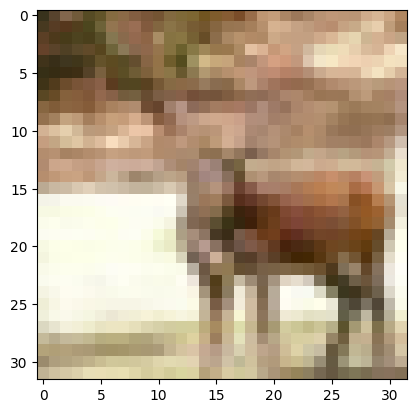

In [54]:
img_busqueda = x_train[1001]
plt.imshow(img_busqueda)

_,_,descriptor_busqueda,_ = convert_to_gray_and_apply_sift([img_busqueda])



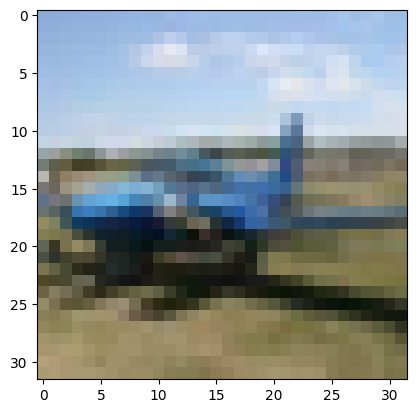

In [96]:
plt.imshow(x_subset[453])

In [58]:
descriptor_busqueda[0].shape

(14, 128)

In [93]:
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# Crear un modelo de k-NN
knn_model = NearestNeighbors(n_neighbors=30)  # Buscar los 5 vecinos más cercanos
knn_model.fit(lista_desciptores_aplanado)  # Ajustar el modelo a los descriptores

# Función para encontrar los vecinos más cercanos para un descriptor dado
def find_nearest_neighbors(descriptor, k = 10):
    descriptor_flat = descriptor.flatten()
    # Encontrar los índices y distancias de los vecinos más cercanos
    distances, indices = knn_model.kneighbors([descriptor_flat], k)  # Obtener k vecinos más cercanos
    return distances, indices

# Ejemplo: Encontrar vecinos más cercanos para el primer descriptor en la primera imagen
contador = Counter()
lista = []
print(len(descriptor_busqueda[0]))
for descriptor in descriptor_busqueda[0]:
    distances, indices = find_nearest_neighbors(descriptor, 20)
    lista.extend([index[indice] for indice in indices[0]])

print(len(lista))
Counter(lista).most_common(10)
# Imprimir los índices de los vecinos más cercanos y sus distancias
#print("Índices de los vecinos más cercanos:", indices)
#print("Distancias a los vecinos más cercanos:", distances)


14
280


[(263, 5),
 (762, 4),
 (381, 4),
 (207, 3),
 (166, 3),
 (81, 3),
 (956, 3),
 (508, 3),
 (779, 3),
 (453, 2)]